In [1]:
pip install nibabel matplotlib numpy scikit-image imageio torch opencv-python

Data shape: (176, 198, 160), Data type: float64


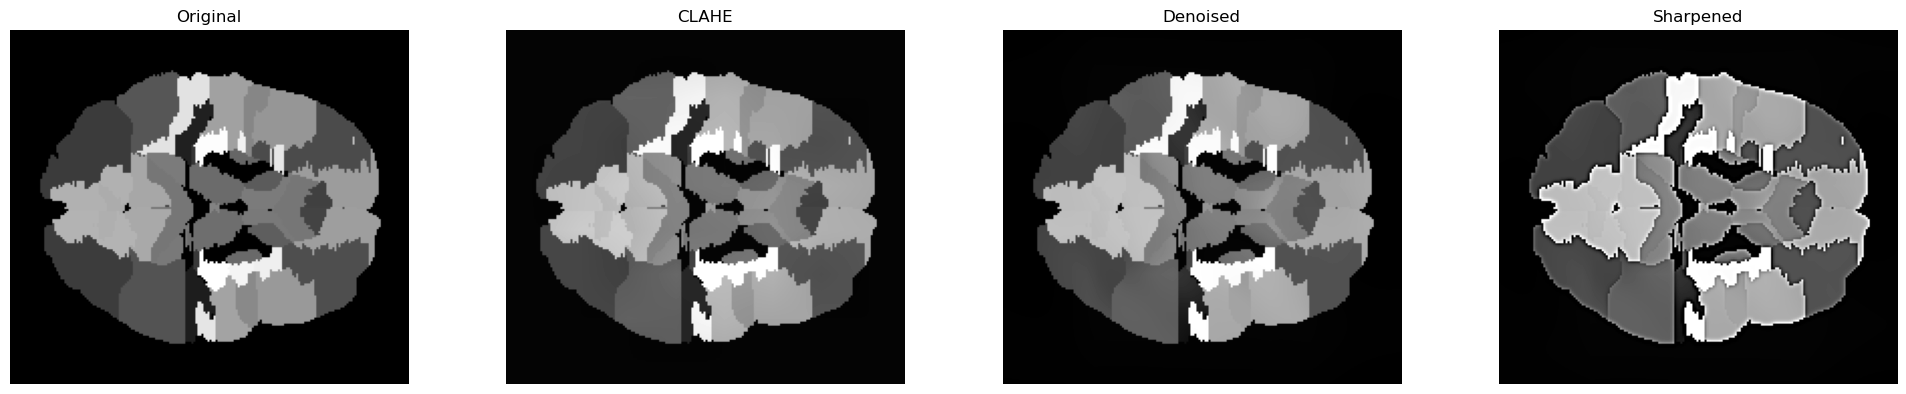

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, transform, restoration, filters

# Load NIfTI file
img = nib.load('t.nii')
data = np.squeeze(img.get_fdata())
print(f"Data shape: {data.shape}, Data type: {data.dtype}")

# Extract middle slice
slice_index = data.shape[2] // 2
slice_img = data[:, :, slice_index]

# Normalize to [0, 1]
slice_img_norm = (slice_img - np.min(slice_img)) / (np.max(slice_img) - np.min(slice_img))

# Apply CLAHE
clahe_img = exposure.equalize_adapthist(slice_img_norm, clip_limit=0.03)

# Denoise with bilateral filter
denoised_img = restoration.denoise_bilateral(clahe_img, sigma_color=0.05, sigma_spatial=15)

# Sharpen image
sharpened_img = filters.unsharp_mask(denoised_img, radius=1.0, amount=1.5)

# Display results
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
titles = ['Original', 'CLAHE', 'Denoised', 'Sharpened']
images = [slice_img_norm, clahe_img, denoised_img, sharpened_img]

for i in range(4):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


CLAHE

Bilateral filtering

Unsharp

Image scaling

Data shape: (176, 198, 160), Data type: float64


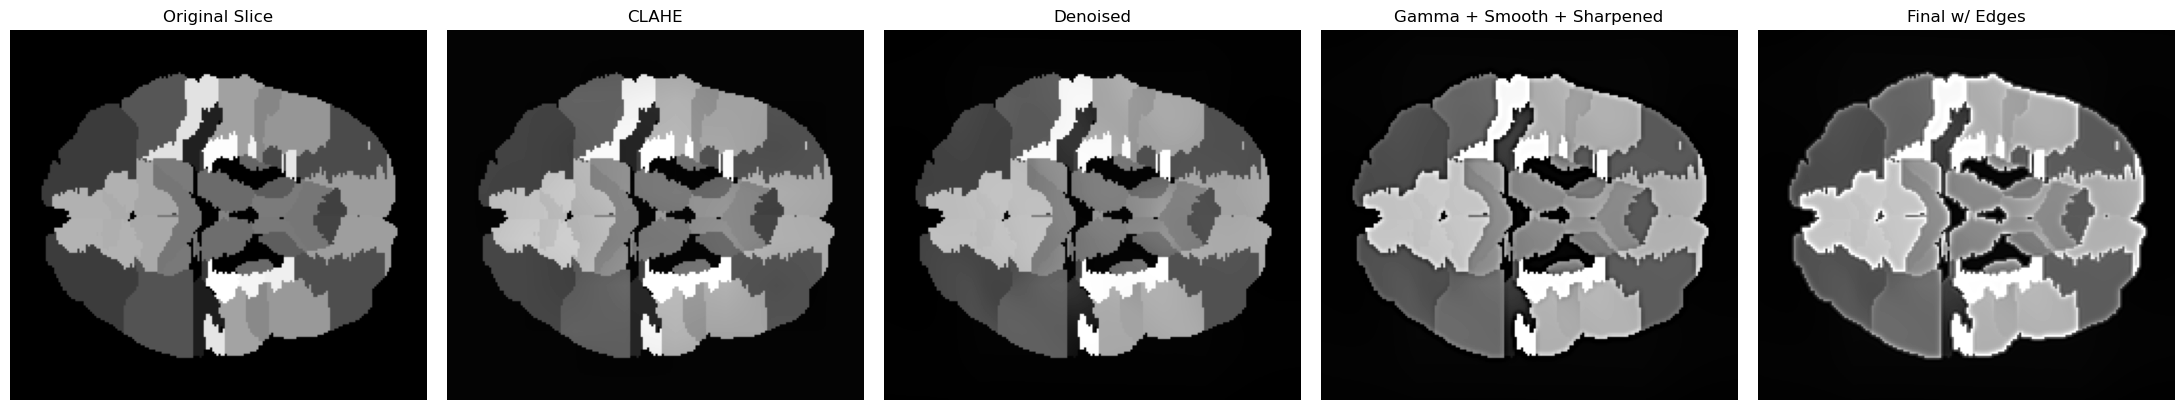

In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, transform, restoration, filters
from skimage.morphology import disk

# Load NIfTI file
img = nib.load('t.nii')
data = np.squeeze(img.get_fdata())
print(f"Data shape: {data.shape}, Data type: {data.dtype}")

# Extract middle slice
slice_index = data.shape[2] // 2
slice_img = data[:, :, slice_index]

# Normalize to [0, 1]
slice_img_norm = (slice_img - np.min(slice_img)) / (np.max(slice_img) - np.min(slice_img))

# CLAHE enhancement
clahe_img = exposure.equalize_adapthist(slice_img_norm, clip_limit=0.03)

# Denoise using bilateral filter
denoised_img = restoration.denoise_bilateral(clahe_img, sigma_color=0.05, sigma_spatial=15)

# Gamma correction
gamma_corrected = exposure.adjust_gamma(denoised_img, gamma=0.9)

# Gaussian smoothing
smoothed_img = filters.gaussian(gamma_corrected, sigma=0.5)

# Sharpen image
sharpened_img = filters.unsharp_mask(smoothed_img, radius=1.0, amount=1.5)

# Edge overlay (optional enhancement)
edges = filters.sobel(sharpened_img)
edge_overlay = np.clip(sharpened_img + 0.5 * edges, 0, 1)

# Display results
titles = [
    'Original Slice', 'CLAHE', 'Denoised',
    'Gamma + Smooth + Sharpened', 'Final w/ Edges'
]
images = [
    slice_img_norm, clahe_img, denoised_img,
    sharpened_img, edge_overlay
]

fig, axs = plt.subplots(1, len(images), figsize=(22, 4))
for i, (title, img) in enumerate(zip(titles, images)):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


Gamma correction

Gaussian smoothing

Sobel edge overlay